In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

csv_clef16_train = '/workspace/data/subfigure-classification/2016/train.csv'
csv_clef16_test = '/workspace/data/subfigure-classification/2016/test.csv'
# csv_clef13_train = '/workspace/data/subfigure-classification/2013/train.csv'
clef13_img_dir = '/workspace/data/subfigure-classification/2013/train'
base_url = '/workspace/data/subfigure-classification'

In [2]:
discard_train_clef16 = {
  "D3DR": ["1475-925X-10-30-14-4.jpg", "1746-160X-6-6-11-1.jpg", "1746-160X-6-6-11-2.jpg", "1746-160X-6-6-11-3.jpg", "1746-160X-6-6-11-4.jpg", "1746-160X-6-6-11-5.jpg", "1746-160X-6-6-19-1.jpg", "1746-160X-6-6-19-2.jpg", "1746-160X-6-6-19-3.jpg", "1746-160X-6-6-19-4.jpg", "1746-160X-6-6-19-5.jpg", "1746-160X-6-18-1-2.jpg", "1746-160X-6-18-1-4.jpg", "1746-160X-6-18-1-5.jpg", "1746-160X-6-18-1-6.jpg", "1749-8090-2-18-1-2.jpg", "1749-8090-6-125-2-2.jpg", "1752-1947-3-71-2-2.jpg", "1752-1947-4-25-2-1.jpg", "1757-1627-0002-0000007013-004-2.jpg", "1757-1627-0002-0000007013-007-2.jpg", "bcr914-2-2.jpg"],
  "GCHE": ["1477-7827-7-9-1-2.jpg"],
  "GFIG": ["1471-2121-8-40-5-2.jpg", "1471-2121-8-40-5-3.jpg", "1471-2121-8-40-5-4.jpg", "1471-2180-10-297-6-2.jpg", "1472-6947-11-54-8-5.jpg", "1532-429X-12-19-4-1.jpg", "1532-429X-12-19-4-2.jpg", "1532-429X-12-19-4-3.jpg", "1532-429X-12-19-4-4.jpg", "1532-429X-12-19-4-5.jpg", "1532-429X-12-19-4-6.jpg", "1532-429X-12-19-4-8.jpg", "1532-429X-12-19-4-9.jpg", "1741-7007-7-83-4-1.jpg", "1745-7580-6-11-3-3.jpg", "1748-7188-5-27-1-2.jpg", "1756-3305-2-12-10-2.jpg", "gb-2011-12-6-r56-3-2.jpg", "IJBI2010-631264.009-2.jpg", "IJBI2011-592924.005-4.jpg", "IJBI2011-592924.005-6.jpg"],
  "GFLO": ["1755-8794-3-45-1-2.jpg"],
  "GGEN": ["1471-2105-10-273-3-1.jpg", "1471-2121-11-60-6-3.jpg"],
}

move_train_clef16 = {
  "GSCR": {
     "1471-2105-10-S12-S12-8-1.jpg": "GFIG",
     "1471-2105-10-S12-S12-8-2.jpg": "GFIG",
     "1471-2105-10-S12-S12-8-3.jpg": "GFIG",
     "1475-925X-3-3-5-1.jpg": "GFIG",
     "1475-925X-3-3-5-2.jpg": "GFIG",
     "1475-925X-3-3-5-3.jpg": "GFIG"
  },
  "GTAB": {
     "1471-2369-12-13-2-1.jpg": "GFIG"
  }
}

discard_test_clef16 = {
  "D3DR": ["1532-429X-11-35-3-3.jpg", "1744-9081-5-41-1-1.jpg", "1744-9081-5-41-1-2.jpg", "1746-1340-15-15-5-1.jpg", "1746-1340-15-15-5-2.jpg", "1746-1340-15-15-5-3.jpg", "1746-1340-15-15-5-4.jpg", "1746-1340-15-15-5-5.jpg", "1746-1340-15-15-5-6.jpg", "1746-1340-15-15-5-7.jpg", "1746-1340-15-15-5-8.jpg", "1746-1340-15-15-5-9.jpg", "1746-1340-15-15-5-10.jpg", "1749-8090-6-40-2-3.jpg", "1749-8090-6-40-2-4.jpg", "1757-1146-1-S1-O43-1-1.jpg", "1757-1146-1-S1-O43-1-2.jpg", "IJBI2010-535329.009-1.jpg", "IJBI2010-535329.009-2.jpg"],
  "DRXR": ["1475-925X-9-73-2-1.jpg", "1475-925X-9-73-2-2.jpg", "1475-925X-9-73-2-3.jpg", "1475-925X-9-73-2-4.jpg", "1475-925X-9-73-2-5.jpg", "1475-925X-9-73-2-6.jpg"],
  "GFIG": ["1471-2202-12-94-3-4.jpg"],
  "GMAT": ["1477-3155-9-13-9-3.jpg"],
  "GFLO": ["1751-0759-2-19-1-5.jpg", "1751-0759-2-19-1-6.jpg", "1751-0759-2-19-1-7.jpg", "1751-0759-2-19-1-9.jpg"], # these ones also appeared on system overview    
}

move_test_clef16 = {
  "GSCR": ["1471-2377-6-36-4-4.jpg"],    
}

discard_train_clef13 = {
  "D3DR": ['1471-2105-11-20-9.jpg', '1471-2105-7-316-3.jpg', '1471-2105-8-389-7.jpg', '1471-213X-8-83-2.jpg', '1471-2202-8-45-6.jpg', '1471-2342-10-5-2.jpg', '1471-2342-7-4-5.jpg', '1471-2407-10-62-2.jpg', '1471-2474-10-96-2.jpg', '1471-2474-10-96-3.jpg', '1471-5945-1-9-6.jpg', '1475-925X-5-39-3.jpg', '1475-925X-6-48-8.jpg', '1476-7120-8-4-5.jpg', '1477-7819-9-71-2.jpg', '1477-7819-9-71-3.jpg', '1746-160X-5-8-3.jpg', '1746-160X-5-8-4.jpg', '1746-160X-6-16-5.jpg', '1748-7161-4-1-2.jpg', '1748-717X-1-27-1.jpg', '1749-7922-4-26-2.jpg', '1749-7922-4-6-2.jpg', '1749-799X-5-50-2.jpg', '1749-799X-5-50-8.jpg', '1749-799X-5-77-4.jpg', '1749-8090-1-9-3.jpg', '1749-8090-2-27-2.jpg', '1749-8090-5-28-3.jpg', '1749-8090-5-35-3.jpg', '1749-8090-5-96-2.jpg', '1749-8090-6-134-1.jpg', '1750-1172-2-2-4.jpg', '1750-1172-2-2-6.jpg', '1752-1947-2-41-1.jpg', '1752-1947-2-41-3.jpg', '1757-1626-2-9359-4.jpg', '1758-2555-1-28-2.jpg', '1758-2555-3-8-3.jpg', '1758-2555-3-8-4.jpg', 'IJBI2007-90216.005.jpg', 'IJBI2010-429051.012.jpg'],
  "GFIG": ['1476-069X-4-19-6.jpg'], # are we considering maps?
  "GTAB": ['1471-2164-9-119-10.jpg']   
}

modality2highlevel = {
    'D3DR': 'MOLECULAR',  # not all 3D images are from molecules
    'DMEL': 'MICROSCOPY',
    'DMFL': 'MICROSCOPY',
    'DMLI': 'MICROSCOPY',
    'DMTR': 'MICROSCOPY',
    'DRAN': 'ORGANISMS',
    'DRCO': 'REMOVE',     # Combined modalities in one image, radiology?
    'DRCT': 'ORGANISMS',
    'DRMR': 'ORGANISMS',
    'DRPE': 'ORGANISMS',
    'DRUS': 'ORGANISMS',
    'DRXR': 'ORGANISMS',
    'DSEC': 'GRAPHICS',  # Printed signals and waves
    'DSEE': 'GRAPHICS',
    'DSEM': 'GRAPHICS',  # Less than 6 samples
    'DVDM': 'ORGANISMS', # ignore?
    'DVEN': 'ORGANISMS', # ignore?
    'DVOR': 'ORGANISMS', # ignore?
    'GCHE': 'MOLECULAR', 
    'GFIG': 'GRAPHICS',
    'GFLO': 'GRAPHICS',
    'GGEL': 'EXPERIMENTAL',
    'GGEN': 'MOLECULAR',
    'GHDR': 'REMOVE', #ignore
    'GMAT': 'REMOVE',
    'GNCP': 'OTHER', #ignore?
    'GPLI': 'OTHER', # There is only one sample
    'GSCR': 'OTHER',
    'GSYS': 'OTHER', #or ignore
    'GTAB': 'OTHER',
}

rename_4_captions_2016 = {
    "train": {
        "DRP2011-927852-001-2.jpg": "DRP2011-927852.001-2.jpg",         
    },
    "test": {
        "IJBI2010-308627-003-8.jpg": "IJBI2010-308627.003-8.jpg",
    }    
}

rename_2_match_file_path = {
    # because typo on img name
    "IJBI2010-308627.003-8.jpg": "IJBI2010-308627-003-8.jpg",
    "1471-2105-6-S2-S11-7-1.jpg": "1471-2105-6-S2-S11-7_1.jpg",
    "1471-2105-6-S2-S11-7-2.jpg": "1471-2105-6-S2-S11-7_2.jpg",
    "1471-2105-6-S2-S11-7-3.jpg": "1471-2105-6-S2-S11-7_3.jpg",
    "1471-2105-6-S2-S11-7-4.jpg": "1471-2105-6-S2-S11-7_4.jpg",
    "1471-2105-6-S2-S11-7-5.jpg": "1471-2105-6-S2-S11-7_5.jpg",
    "1471-2105-6-S2-S11-7-6.jpg": "1471-2105-6-S2-S11-7_6.jpg",
    "1471-2105-6-S2-S11-7-7.jpg": "1471-2105-6-S2-S11-7_7.jpg",
    "1471-2105-6-S2-S11-7-8.jpg": "1471-2105-6-S2-S11-7_8.jpg",
    "1471-2105-6-S2-S11-7-9.jpg": "1471-2105-6-S2-S11-7_9.jpg",
    "1471-2105-6-S2-S11-7-10.jpg": "1471-2105-6-S2-S11-7_10.jpg",
    "IJBI2010-535329.015-1.jpg": "IJBI2010-535329-1.015.jpg",
    "IJBI2010-535329.015-2.jpg": "IJBI2010-535329-2.015.jpg",
    "IJBI2010-535329.015-3.jpg": "IJBI2010-535329-3.015.jpg",
    "IJBI2010-535329.015-4.jpg": "IJBI2010-535329-4.015.jpg",
    "IJBI2010-535329.015-5.jpg": "IJBI2010-535329-5.015.jpg",
}

# i don't want to change the name here as the format for the last 
# 5 goes against pattern
rename_2_match_file_name = {
    "IJBI2010-308627.003-8.jpg": "IJBI2010-308627-003-8.jpg",
    "1471-2105-6-S2-S11-7-1.jpg": "1471-2105-6-S2-S11-7_1.jpg",
    "1471-2105-6-S2-S11-7-2.jpg": "1471-2105-6-S2-S11-7_2.jpg",
    "1471-2105-6-S2-S11-7-3.jpg": "1471-2105-6-S2-S11-7_3.jpg",
    "1471-2105-6-S2-S11-7-4.jpg": "1471-2105-6-S2-S11-7_4.jpg",
    "1471-2105-6-S2-S11-7-5.jpg": "1471-2105-6-S2-S11-7_5.jpg",
    "1471-2105-6-S2-S11-7-6.jpg": "1471-2105-6-S2-S11-7_6.jpg",
    "1471-2105-6-S2-S11-7-7.jpg": "1471-2105-6-S2-S11-7_7.jpg",
    "1471-2105-6-S2-S11-7-8.jpg": "1471-2105-6-S2-S11-7_8.jpg",
    "1471-2105-6-S2-S11-7-9.jpg": "1471-2105-6-S2-S11-7_9.jpg",
    "1471-2105-6-S2-S11-7-10.jpg": "1471-2105-6-S2-S11-7_10.jpg",    
}

In [3]:
def get_check_location(x, col, base_url):
    ''' 
        Verify that image exists, if not mark the 
        row to be removed.
    '''
    image_path = os.path.join(base_url, x.img_path)
    if not os.path.exists(image_path):
        print(image_path)
        return 'REMOVE'
    else: return x[col]
    
def create_clef13_df(clef13_img_dir):    
    modalities = [x for x in os.listdir(clef13_img_dir) if os.path.isdir(os.path.join(clef13_img_dir, x))]
    modalities.remove('COMP')

    img_name_l  = []
    img_label_l = []

    for modality in modalities:
        imgs_path = os.path.join(clef13_img_dir, modality)
        img_names = [x for x in os.listdir(imgs_path) if x[-4:] == '.jpg']
        labels = [modality] * len(img_names)
        img_name_l  += img_names
        img_label_l += labels

    df = pd.DataFrame(list(zip(img_name_l, img_label_l)), columns =['img', 'modality'])
    df.loc[:, 'set'] = 'TRAIN'
    df.loc[:, 'source'] = 'clef13'
    df.loc[:, 'img_path'] = df.apply(lambda x: "2013/train/{0}/{1}".format(x.modality, x.img), axis=1)
    return df

def mark_removed_imgs(df, remove_dict):
    affected_modalities = remove_dict.keys()
    for aff_mod in affected_modalities:
        aff_imgs = [x for x in remove_dict[aff_mod]]
        for img in aff_imgs:
            df.loc[df['img'] == img, ['modality']] = 'REMOVE'
            
def update_moved_imgs(df, move_dict):
    affected_modalities = move_dict.keys()
    
    for aff_mod in affected_modalities:
        aff_images = move_dict[aff_mod].keys()
        for img in aff_images:
            df.loc[df['img']==img, ['modality']] = move_dict[aff_mod][img]   
            
def map_modality2higher(x):
    if x == 'REMOVE': return 'REMOVE'
    else: return modality2highlevel[x]
    
def rename_2_match_captions(x):
    if x.source == 'clef16':
        rename_d = rename_4_captions_2016['train'] if x.set == 'TRAIN' else rename_4_captions_2016['test']
        if x.img in rename_d:
            return rename_d[x.img]
        else: return x.img
    return x.img

def rename_2_match_storage(x, col):
    rename_dict = rename_2_match_file_name if col == "img" else rename_2_match_file_path
    
    # fix some typos on image names
    if x.img in rename_dict:
        if col == "img":
            return rename_dict[x.img]
        else: # change storage ref            
            p = x.img_path.split("/")
            p[-1] = rename_dict[x.img]
            return '/'.join(p)
    else:
        return x.img if col == "img" else x.img_path

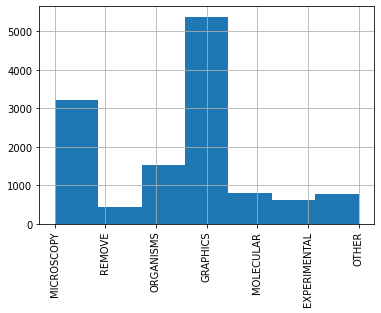

In [4]:
# load clef16 train
df_clef16_train = pd.read_csv(csv_clef16_train, header=None)
df_clef16_train.columns = ['img', 'modality']
df_clef16_train.loc[:,'img'] = df_clef16_train.apply(lambda x: f"{x['img']}.jpg", axis=1)
df_clef16_train.loc[:, 'set'] = 'TRAIN'
df_clef16_train.loc[:, 'source'] = 'clef16'
df_clef16_train.loc[:, 'img_path'] = df_clef16_train.apply(lambda x: "2016/train/{0}/{1}".format(x.modality, x.img), axis=1)

# load clef16 test
df_clef16_test = pd.read_csv(csv_clef16_test, header=None, sep=" ")
df_clef16_test.columns = ['img', 'modality']
df_clef16_test.loc[:,'img'] = df_clef16_test.apply(lambda x: f"{x['img']}.jpg", axis=1)
df_clef16_test.loc[:, 'set'] = 'TEST'
df_clef16_test.loc[:, 'source'] = 'clef16'
df_clef16_test.loc[:, 'img_path'] = df_clef16_test.apply(lambda x: "2016/test/{0}".format(x.img), axis=1)

# load clef13 train
df_clef13_train = create_clef13_df(clef13_img_dir)

mark_removed_imgs(df_clef13_train, discard_train_clef13)
mark_removed_imgs(df_clef16_train, discard_train_clef16)
update_moved_imgs(df_clef16_train, move_train_clef16)

# create join dataframe
df = pd.concat([df_clef16_train, df_clef16_test, df_clef13_train]).reset_index(drop=True)
# solve path issues
df.loc[:, 'img_path'] = df.apply(lambda x: rename_2_match_storage(x, 'img_path'), axis=1)
df.loc[:, 'img'] = df.apply(lambda x: rename_2_match_storage(x, 'img'), axis=1)
# map labels to higher modality
df.loc[:, 'higher_modality'] = df.apply(lambda x: map_modality2higher(x.modality), axis=1)
# clean missing images
df.loc[:, 'modality'] = df.apply(lambda x: get_check_location(x, 'modality', base_url), axis=1)
df.loc[:, 'higher_modality'] = df.apply(lambda x: get_check_location(x, 'higher_modality', base_url), axis=1)

df.higher_modality.hist(bins=7)
plt.xticks(rotation='vertical');

In [5]:
df = df[df['higher_modality'] != 'REMOVE']
df.shape

(12286, 6)

In [6]:
def get_compound_root(img_id):
    # Obtain the part of the image name without subfigure labeling
    p = re.compile('([-|_]|[.])[0-9]*.(jpg)$')
    match = p.search(img_id)
    m_start, m_end = match.span()
    return img_id[:m_start]

def create_captions_dict(csv_file):
    # create a captions dictionary for a convenient matching
    # works for the FIGURE DETECTION file but this files is incomplete
    captions_dict = {}
    with open(csv_file, encoding='ISO-8859-1') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            captions_dict[row[0]] = row[1]
    return captions_dict

def create_caption_dictionary(csv_file):
    # works with the COMPOUND FIGURE DETECTION file
    captions = {}
    with open(csv_file, encoding='ISO-8859-1') as csvfile:
        reader = csv.reader(csvfile, delimiter='\t')
        for row in reader:
            # the original file has some empty lines
            if len(row) != 0:
                # lines using tab separators
                if len(row) == 1:
                    sp = row[0].split('\t')
                    if len(sp) == 2:
                        # remove the ,,,,,,,, sequences
                        captions[sp[0]] = sp[1].replace(',,', '').replace("\xa0", "")
                    else:
                        # there is at least one case there the id is not present
                        # so the line has only one value
                        captions[sp[0]] = ''
                elif len(row) == 2:
                    captions[row[0]] = row[1]
    return captions

In [7]:
import csv
from pathlib import Path

BASE_PATH = Path('/workspace/data')
CAPTIONS16_TRAIN = BASE_PATH / 'compound-figure-detection' / '2016' / 'captions-train.csv' #CompoundFigureDetectionTraining2016-Captions.csv 
# CAPTIONS16_TEST  = BASE_PATH / 'figure-separation' / '2016' / 'captions-test.csv'
CAPTIONS16_TEST  = BASE_PATH / 'compound-figure-detection' / '2016' / 'captions-test.csv'

captions16_train = create_caption_dictionary(CAPTIONS16_TRAIN)
captions16_test  = create_caption_dictionary(CAPTIONS16_TEST)

In [8]:
import re

def get_caption(x):
    img_id = x.img[:-4] if x.source == 'clef13' else get_compound_root(x.img)
    captions_d = captions16_train if x.set == 'TRAIN' else captions16_test
    try:
        return captions_d[img_id]
    except KeyError:
        return "None"
        print(f"{x.img}, {img_id}, {x.source}, {x.set}")

In [9]:
df.loc[:, 'img'] = df.apply(lambda x: rename_2_match_captions(x), axis=1)

In [10]:
df.loc[:, 'caption'] = df.apply(lambda x: get_caption(x), axis=1)

In [12]:
output_path = '/workspace/data/higher_modality.csv'
df.to_csv(output_path, sep='\t', header=None)

In [11]:
df[df.caption =='None']

,img,modality,set,source,img_path,higher_modality,caption
11575,1471-2474-3-5-2.jpg,DRXR,TRAIN,clef13,2013/train/DRXR/1471-2474-3-5-2.jpg,ORGANISMS,None
11576,1471-2474-3-5-5.jpg,DRXR,TRAIN,clef13,2013/train/DRXR/1471-2474-3-5-5.jpg,ORGANISMS,None
12716,cc8332-1.jpg,GTAB,TRAIN,clef13,2013/train/GTAB/cc8332-1.jpg,OTHER,None


In [74]:
from sklearn.model_selection import train_test_split
df_train = df[df.set == 'TRAIN']
X = df_train.img.values
#X = np.random.randn(y.shape[0], 2)

In [75]:
from sklearn.preprocessing import LabelEncoder

random_state = 443

y = df_train.higher_modality.values
le = LabelEncoder()
le.fit(y)
y_ = le.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_, test_size=0.2, random_state=random_state, stratify=y_)

In [76]:
X_train

array(['1471-2164-11-S1-S6-4-2.jpg', '1755-8794-2-47-4-9.jpg',
       '1471-2202-6-36-5-3.jpg', ..., '1746-6148-7-42-1-6.jpg',
       '1472-6882-10-78-1-3.jpg', '1477-7819-6-130-3-2.jpg'], dtype=object)

In [79]:
def get_split_set(x, set_name):
    if set_name == 'TEST': return 'TEST'
    if x in X_train:
        return 'TRAIN'
    else: return 'VAL'
    
df.loc[:, 'split_set'] = df.apply(lambda x: get_split_set(x.img, x.set), axis=1)

In [81]:
df.groupby('split_set').count()

,img,modality,set,source,img_path,higher_modality,caption
split_set,,,,,,,
TEST,4097,4097,4097,4097,4097,4097,4097
TRAIN,6551,6551,6551,6551,6551,6551,6551
VAL,1638,1638,1638,1638,1638,1638,1638


In [82]:
X_train.shape, X_test.shape

((6551,), (1638,))

In [84]:
output_path = '/workspace/data/higher_modality.csv'
df.to_csv(output_path, sep='\t', index=False)